1. break down the type of stuttering and calculate statistics
2. check transcription accuracy of the audio and transcription file
    - using different parameter


# Installation

In [ ]:
!pip install numpy pandas scipy


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import IPython
import os
import sys
import random
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Setup

In [5]:
selection_count = 10
directory_path = "/projectnb/ds549/projects/AImpower/datasets"
gt_path = "/projectnb/ds549/projects/AImpower/ground_truth_transcript"

In [6]:
for file in os.listdir(directory_path):
    print(file)

for file in os.listdir(gt_path):
    print(file)

updated_annotation_deid_full
audio_deid_full
D00XX_A_ground_truth_cleaned.csv
P00XX_ground_truth_cleaned.csv


## Notes
* ```audio/segments``` ==> ```annotation/D*_A.txt```
* ```audio/recitation``` ==> ```annotation/P*.txt```
    * does not really have many stuttering transcription
* ```annotation/*_B.txt```: from moderator but moderator's audios are not segmented so need to be retrieved from the complete meeting file

# Put Annotation & Audio into pd.DataFrames

In [25]:
annotation_path = os.path.join(directory_path, "updated_annotation_deid_full")
audio_path = os.path.join(directory_path, "audio_deid_full")
ground_truth_A = os.path.join(gt_path, "D00XX_A_ground_truth_cleaned.csv")
ground_truth_P = os.path.join(gt_path, "P00XX_ground_truth_cleaned.csv")
folders = random.choices(os.listdir(audio_path), k=10)

In [8]:
data = dict()

for folder in folders:

    data[folder] = dict()

    # audio file retrieval
    index = []
    audio_start_time = []
    audio_end_time = []
    audio_filename = []

    for subfile in os.listdir(os.path.join(audio_path, f"{folder}/segments")):
        meta_file_info = subfile.split("_")

        index.append(meta_file_info[0])
        audio_start_time.append(float(meta_file_info[1]) / 1000)
        audio_end_time.append(float(meta_file_info[2][:-4]) / 1000)
        audio_filename.append(os.path.join(audio_path, f"{folder}/segments/{subfile}"))

    data_appender = {'index': index, 'audio-start-time': audio_start_time, 'audio-end-time': audio_end_time, 'audio-segment-filename': audio_filename}
    data[folder]['audio_A'] = pd.DataFrame(data_appender)
    data[folder]['audio_A'] = data[folder]['audio_A'].sort_values(by=['audio-start-time'], ascending=True)


    index = []
    audio_start_time = []
    audio_end_time = []
    audio_filename = []

    for subfile in os.listdir(os.path.join(audio_path, f"{folder}/recitation")):
        meta_file_info = subfile.split("_")

        index.append(meta_file_info[0])
        audio_start_time.append(float(meta_file_info[1]) / 1000)
        audio_end_time.append(float(meta_file_info[2][:-4]) / 1000)
        audio_filename.append(os.path.join(audio_path, f"{folder}/recitation/{subfile}"))

    data_appender = {'index': index, 'audio-start-time': audio_start_time, 'audio-end-time': audio_end_time, 'audio-segment-filename': audio_filename}
    data[folder]['audio_P'] = pd.DataFrame(data_appender)
    data[folder]['audio_P'] = data[folder]['audio_P'].sort_values(by=['audio-start-time'], ascending=True)


    # annotation file retrieval
    annotation_A = pd.read_csv(os.path.join(annotation_path, f"{folder}/D{folder}_A.txt"), sep='\t', names=['start-time', 'end-time', 'transcription'])
    annotation_A['index'] = folder
    data[folder]["annotation_A"] = annotation_A
    data[folder]["annotation_A"] = data[folder]["annotation_A"].sort_values(by=['start-time'], ascending=True)

    annotation_P = pd.read_csv(os.path.join(annotation_path, f"{folder}/P{folder}.txt"), sep='\t', names=['start-time', 'end-time', 'transcription'])
    annotation_P['index'] = folder
    data[folder]["annotation_P"] = annotation_P
    data[folder]["annotation_P"] = data[folder]["annotation_P"].sort_values(by=['start-time'], ascending=True)

In [9]:
print(f"selected data samples: {data.keys()}")

selected data samples: dict_keys(['0030', '0066', '0053', '0007', '0061', '0033', '0047', '0017', '0048', '0044'])


* * *

# Analysis

We are performing analysis on a limited amount of the dataset and use those results to generalize the dataset due to the lengths and amount of all audio files.

_Data Symbols_
According to the paper...
* [] - Word-level repetition
* /r - sound repetition
* /b - blocks
* /p - prolongation
* /i - interjection

### Approaches
1. Randomly select 10 data samples
2. Within the segmented audios in the 10 data samples, further select only ten of them
3. Evaluate the following:
    * length distribution of each audio segment
    * annotation counting for each audio segment
    
**evaluations would be done separately on _P data and _A data**

In [10]:
# samplerate, data = wavfile.read(data['0038']['audio_P'].iloc[0]['audio-segment-filename'])

In [11]:
iterator = iter(data)

In [12]:
unit_test_id = next(iterator)

In [13]:
print(data[unit_test_id]['annotation_A'])
print(data[unit_test_id]['audio_A'])
print(data[unit_test_id]['annotation_A'].iloc[-1])
print(data[unit_test_id]['audio_A'].iloc[-1]['audio-segment-filename'])
IPython.display.Audio(data[unit_test_id]['audio_A'].iloc[-1]['audio-segment-filename'])

     start-time  end-time                                   transcription  \
0         12.30     18.44                         呀我可以呃/i我从小就口吃，而且口吃的很严重。   
1         18.51     27.25                    我差不多从三岁到四岁开始就口吃的非常严重不过啊/i其实。   
2         28.28     32.01                                 口吃其实是一件非常痛苦的事情。   
3         32.13     41.69              就是我经常有很多朋友或者亲戚他们经常就说我，他说你可以说话说慢点吗？   
4         41.93     49.91                    但是我一直想跟他们解释，口吃就是语说话，我说慢了也口吃。   
..          ...       ...                                             ...   
162     1794.43   1800.19                        买过一个呃/i/pAmazon的那个语言呃/i。   
163     1801.27   1809.56               语音[语/r音]识别的机器，后来我觉得经常我所说的话它们都听错了。   
164     1834.44   1844.36    是的我/r[我/r/b]觉得它们听错有[有]两个原因，一方面是我说的英语可能不是太标准。   
165     1844.46   1855.26  另一方面我/b可能卡住了我在一个地方卡住了，或者是我[我]把这音拖长了或者我有时候把音那个。   
166     1855.93   1864.96            我重复了你比如说[比如说]*我把这个音重复了，然后它们就听[听]不太懂。   

    index  
0    0030  
1    0030  
2    0030  
3    0030  
4    0030  
.. 

In [14]:
for key, _data in data.items():
    data[key]['audio_A']['audio-length'] = _data['audio_A']['audio-end-time'] - _data['audio_A']['audio-start-time']
    data[key]['audio_P']['audio-length'] = _data['audio_P']['audio-end-time'] - _data['audio_P']['audio-start-time']
    data[key]['annotation_A']['transcription-length'] = _data['annotation_A']['end-time'] - _data['annotation_A']['start-time']
    data[key]['annotation_P']['transcription-length'] = _data['annotation_P']['end-time'] - _data['annotation_P']['start-time']

    # df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))
    data[key]['annotation_A']['stutter-count'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/') + x.count('[')))
    data[key]['annotation_P']['stutter-count'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/') + x.count('[')))


    data[key]['annotation_A']['mask-count'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('<')))
    data[key]['annotation_P']['mask-count'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('<')))

In [15]:
data['0049']['audio_A']

KeyError: '0049'

## Masking Statistics

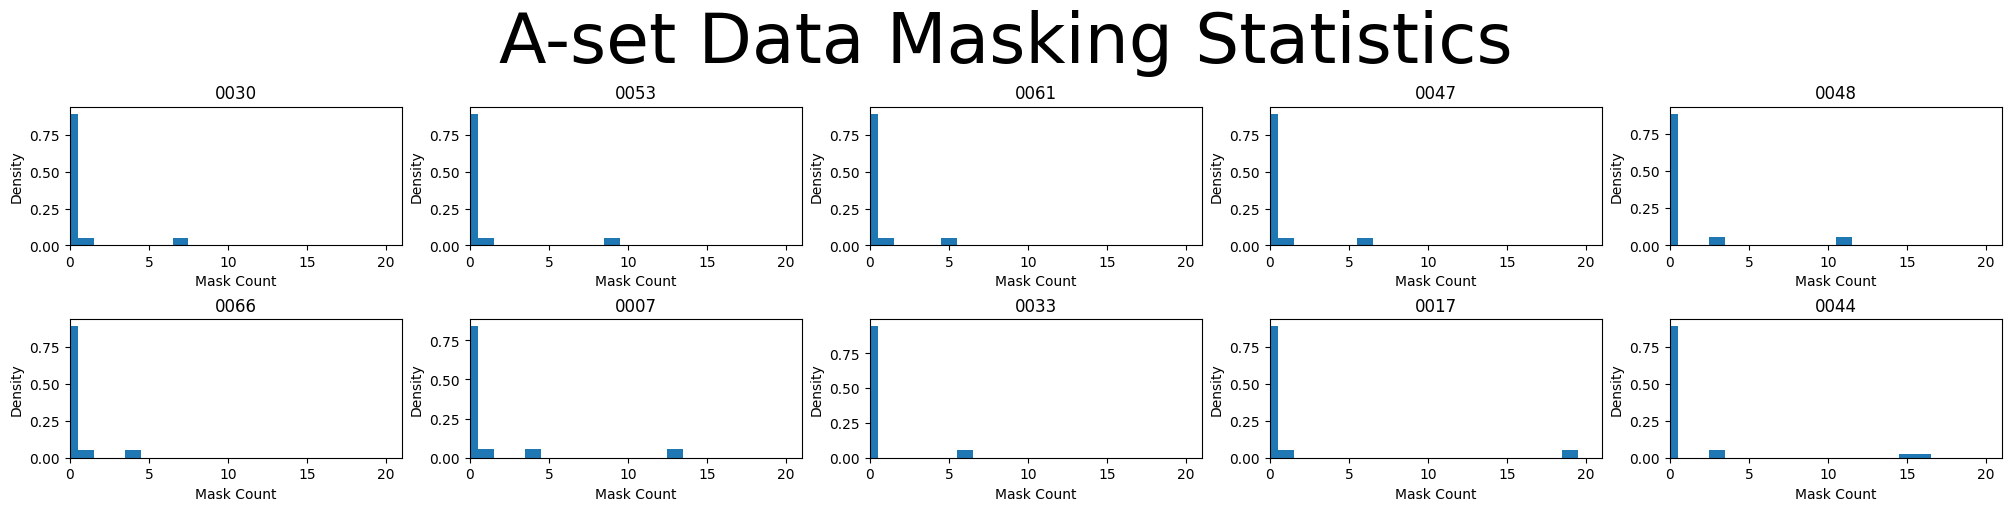

In [16]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Masking Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['mask-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Mask Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

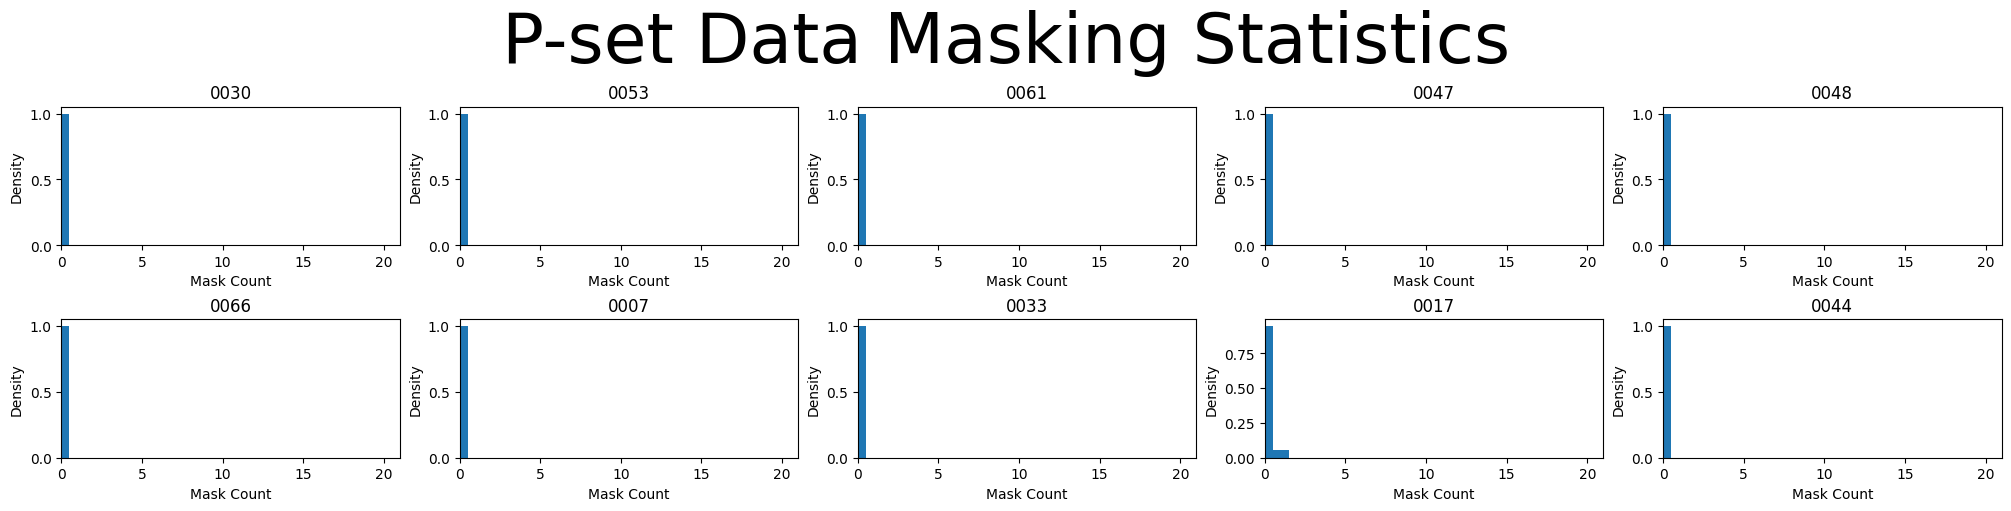

In [17]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Masking Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['mask-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Mask Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

## Stutter Statistics

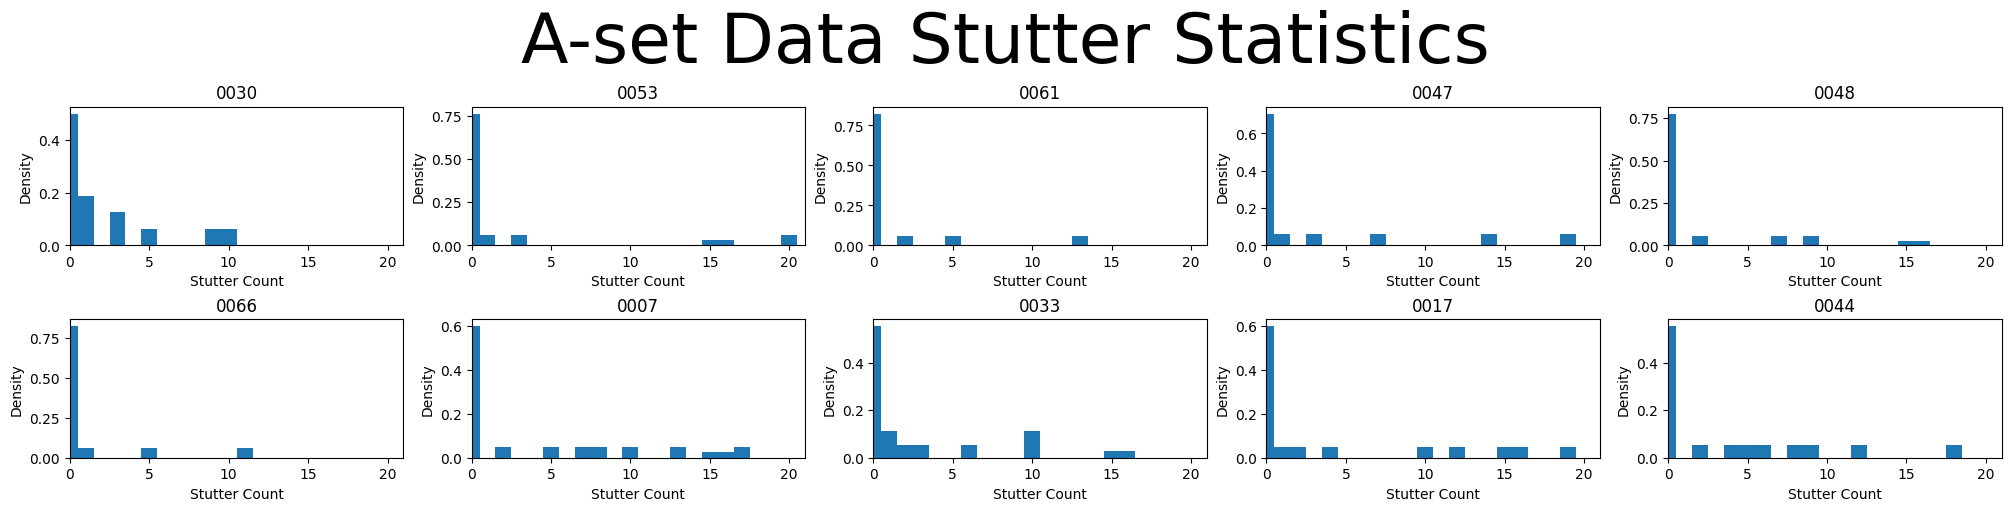

In [18]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

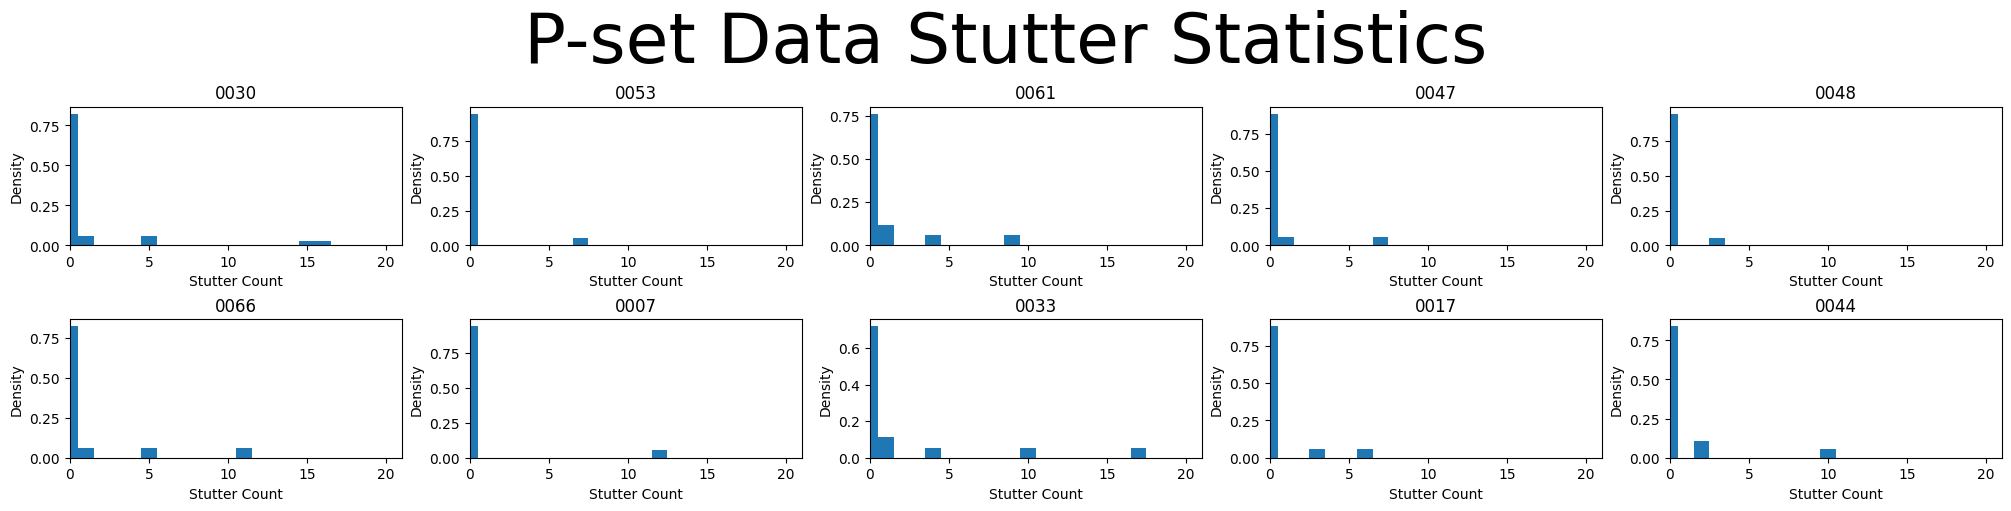

In [19]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['stutter-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

## Duration Statistics

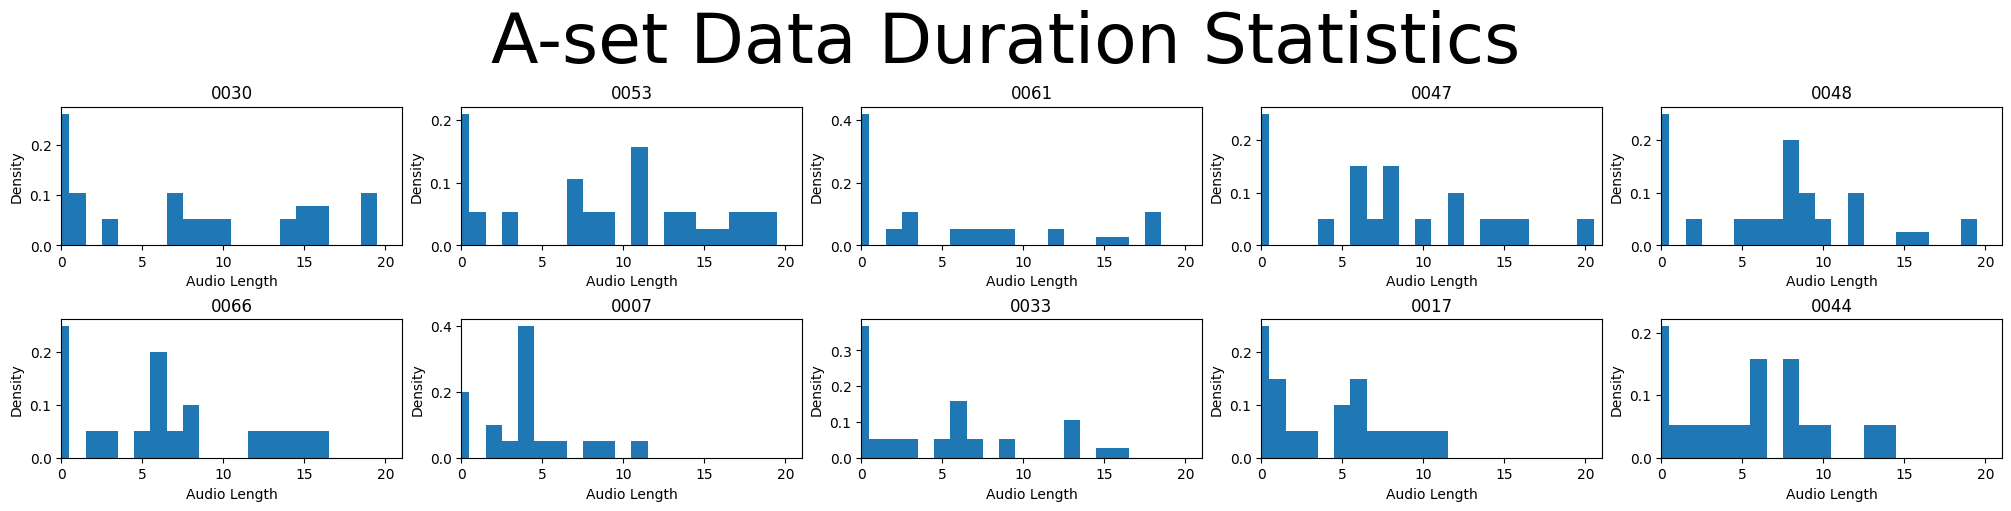

In [20]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Duration Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['audio_A']['audio-length']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Audio Length')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

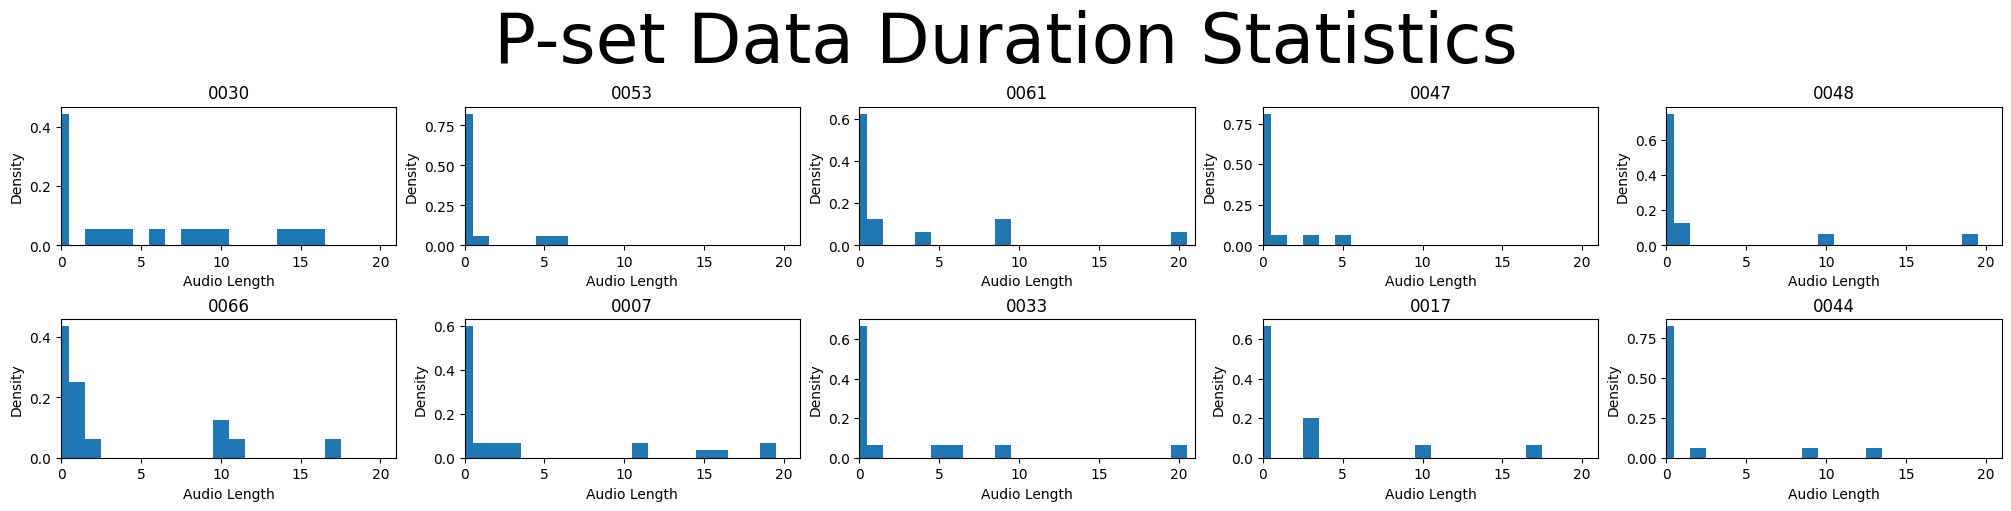

In [21]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Duration Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['audio_P']['audio-length']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Audio Length')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

Stuttering Type Analysis
* [] - Word-level repetition
* /r - sound repetition
* /b - blocks
* /p - prolongation
* /i - interjection

In [34]:
for key, _data in data.items():
  data[key]['annotation_A']['stutter-count_[]'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('[')))
  data[key]['annotation_P']['stutter-count_[]'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('[')))
  data[key]['annotation_A']['stutter-count_/r'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/r')))
  data[key]['annotation_P']['stutter-count_/r'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/r')))
  data[key]['annotation_A']['stutter-count_/b'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/b')))
  data[key]['annotation_P']['stutter-count_/b'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/b')))
  data[key]['annotation_A']['stutter-count_/p'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/p')))
  data[key]['annotation_P']['stutter-count_/p'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/p')))
  data[key]['annotation_A']['stutter-count_/i'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/i')))
  data[key]['annotation_P']['stutter-count_/i'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/i')))

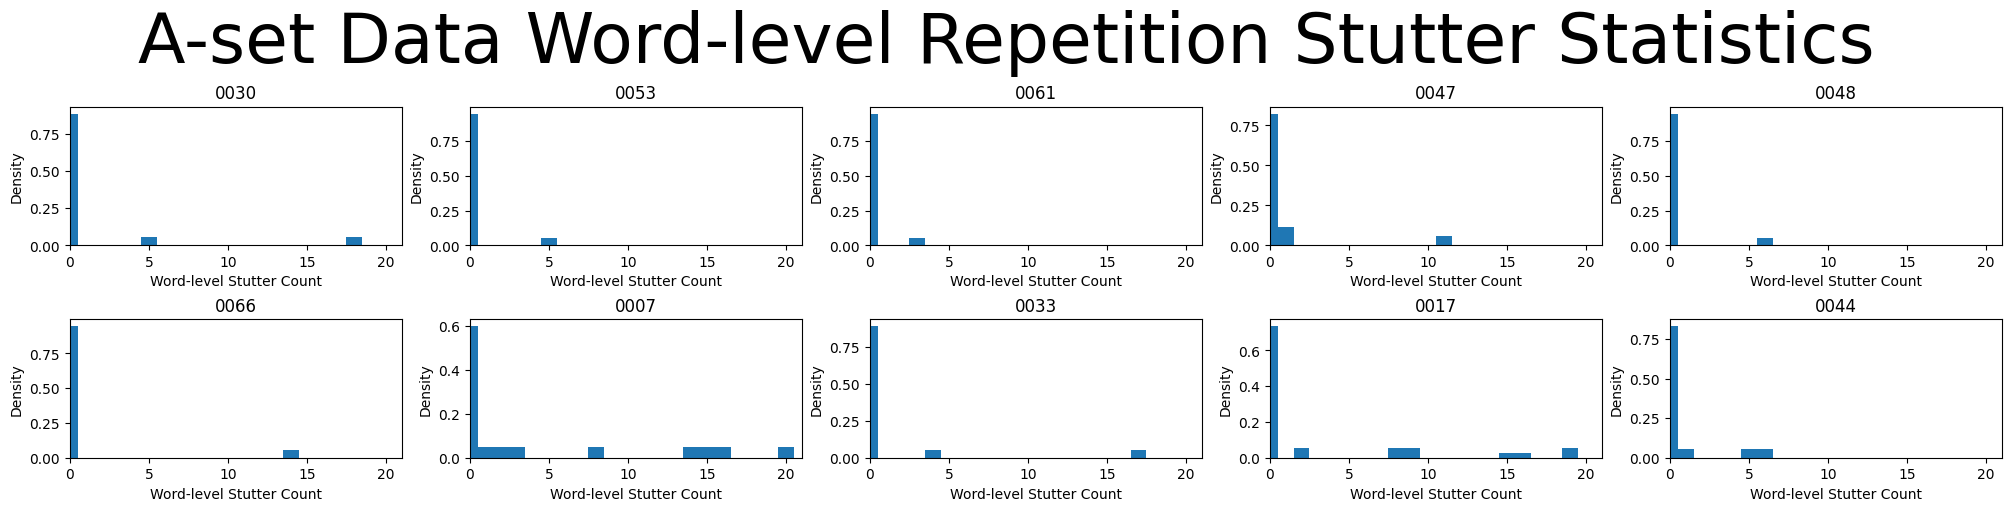

In [36]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Word-level Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count_[]']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Word-level Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

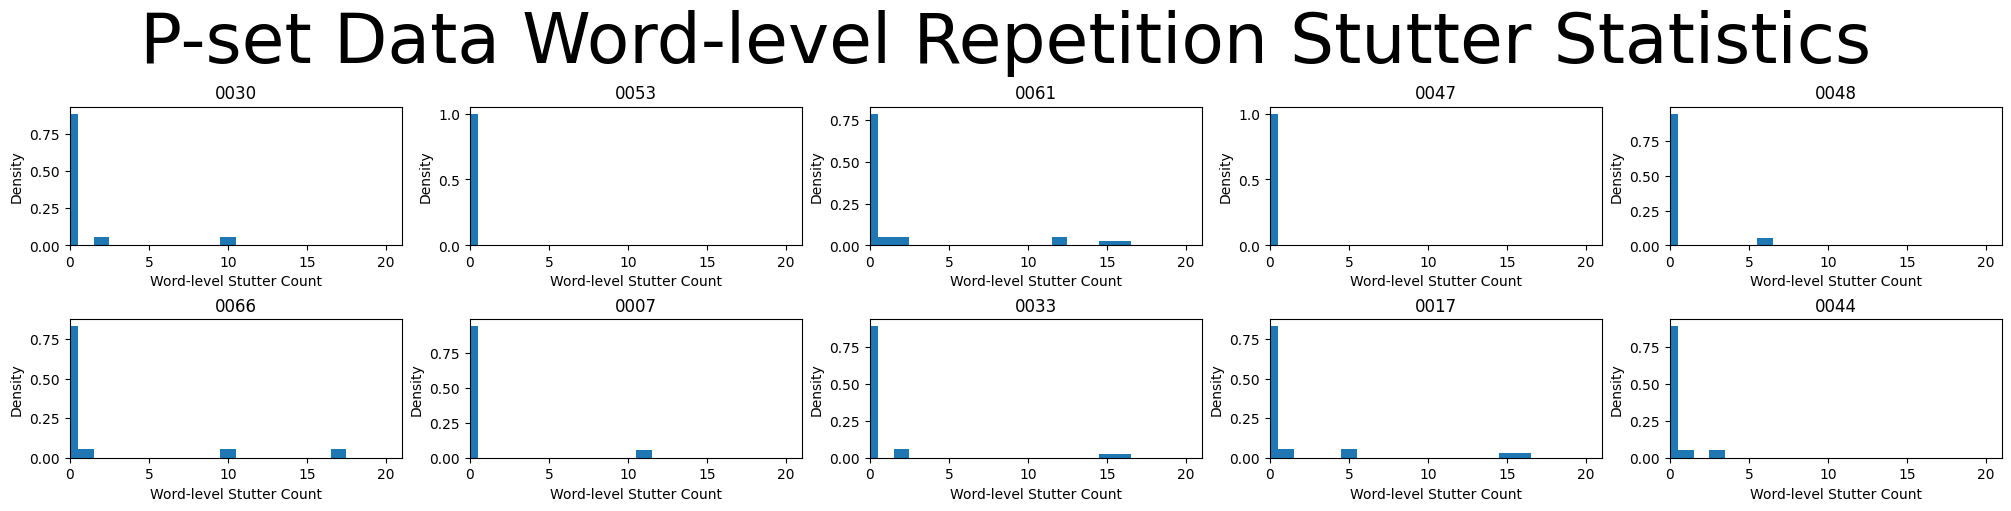

In [37]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Word-level Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['stutter-count_[]']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Word-level Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

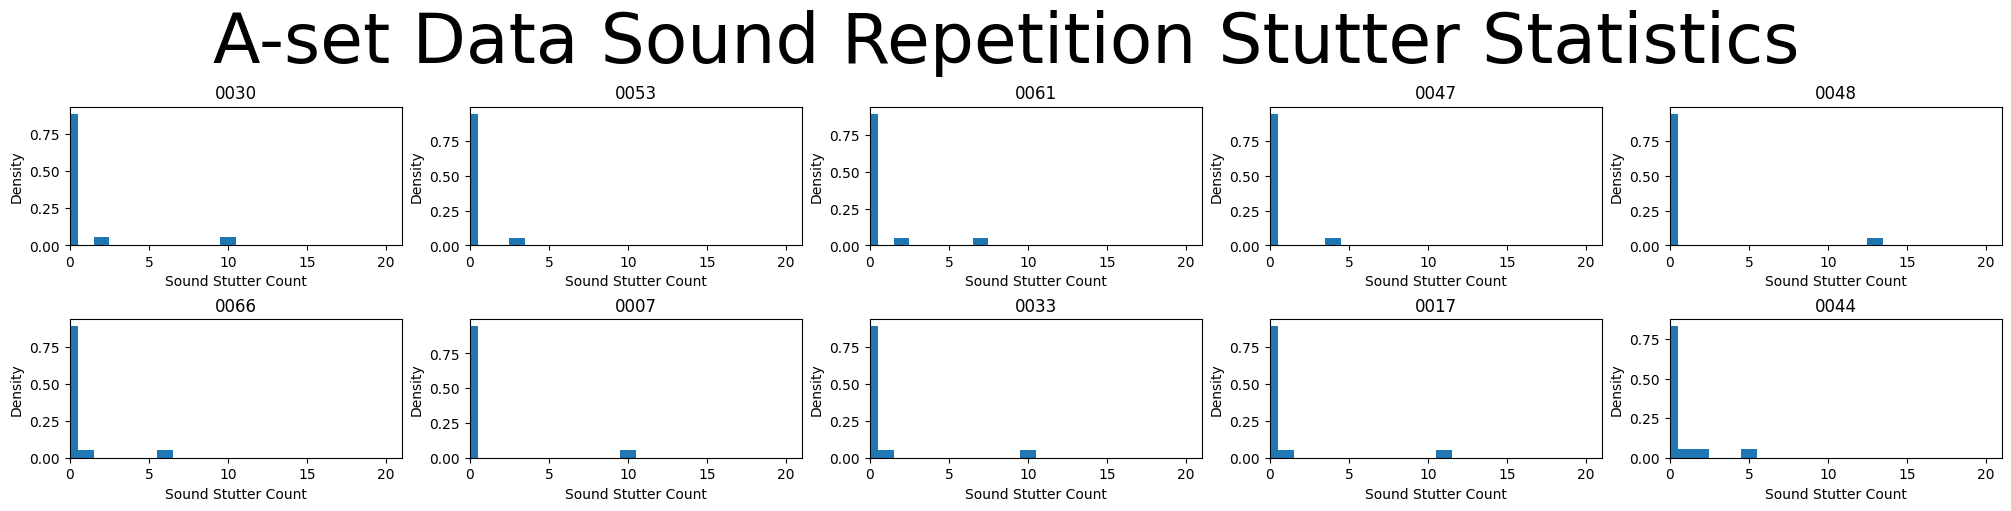

In [38]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Sound Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count_/r']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Sound Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

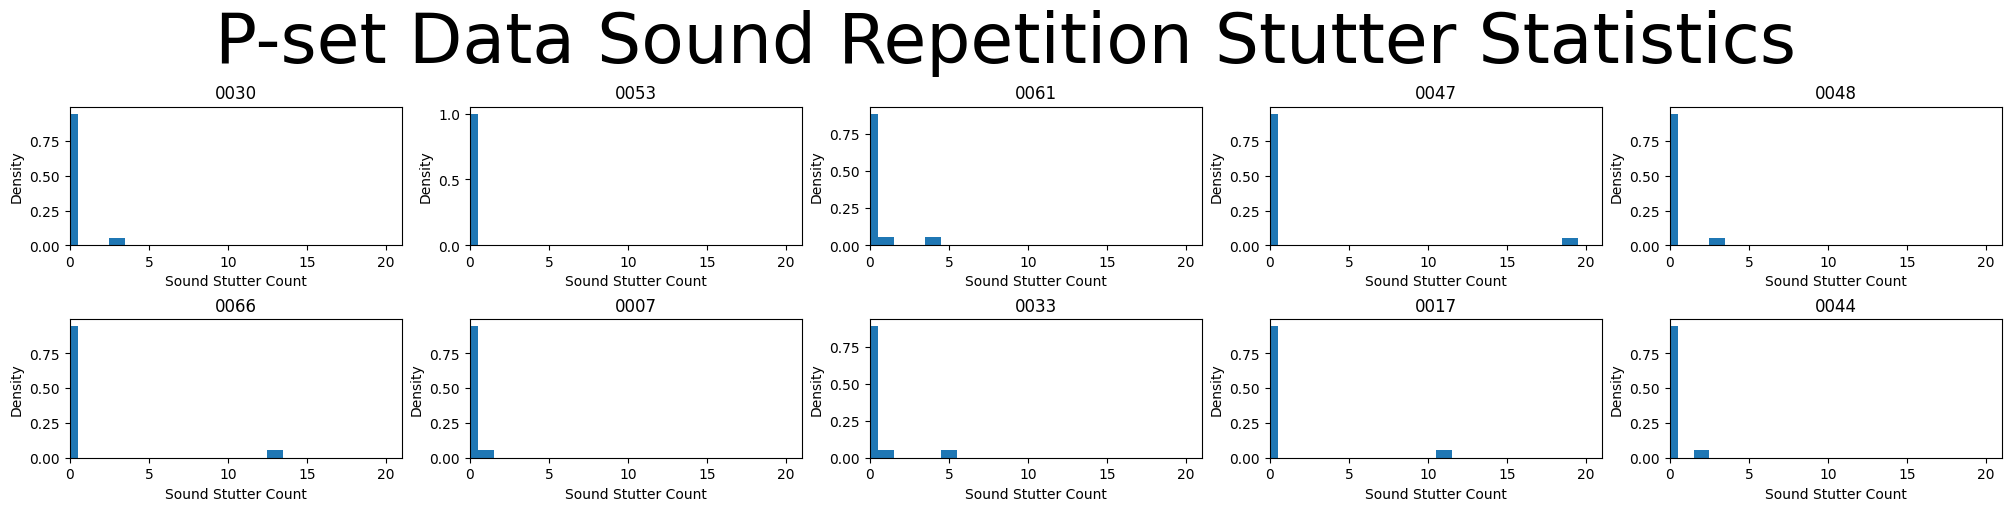

In [39]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Sound Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['stutter-count_/r']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Sound Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

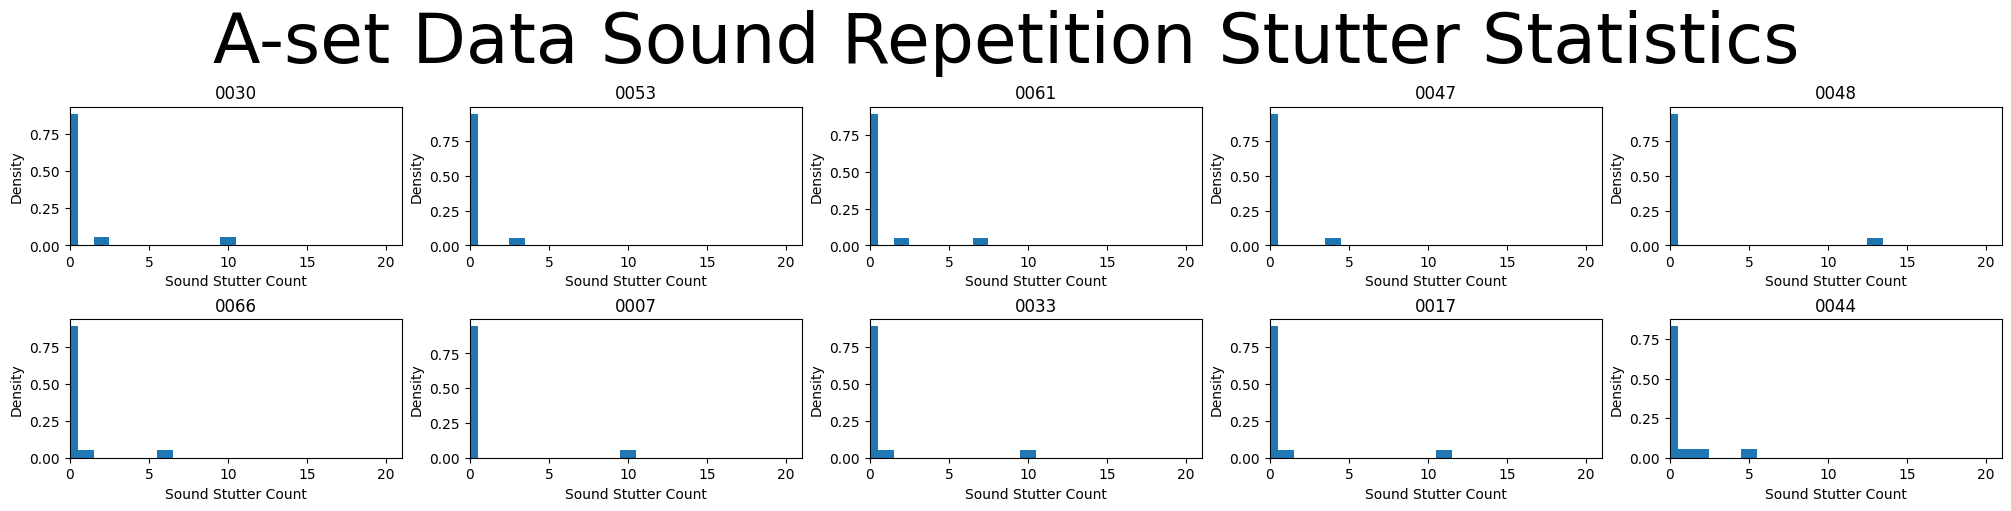

In [40]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Sound Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count_/r']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Sound Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

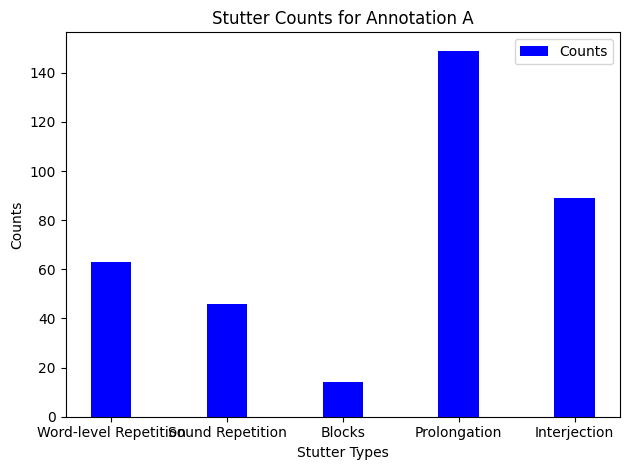

In [41]:
stuttering_types = {
    'Word-level Repetition': 'stutter-count_[]',
    'Sound Repetition': 'stutter-count_/r',
    'Blocks': 'stutter-count_/b',
    'Prolongation': 'stutter-count_/p',
    'Interjection': 'stutter-count_/i'
}

counts = [data[key]['annotation_A'][col].sum() for col in stuttering_types.values()]

x = np.arange(len(stuttering_types))
width = 0.35
fig, ax = plt.subplots()

ax.bar(x, counts, width, color='blue')

ax.set_xlabel('Stutter Types')
ax.set_ylabel('Counts')
ax.set_title(f'Stutter Counts for Annotation A')
ax.set_xticks(x)
ax.set_xticklabels(stuttering_types.keys())
ax.legend(['Counts'])

plt.tight_layout()
plt.show()

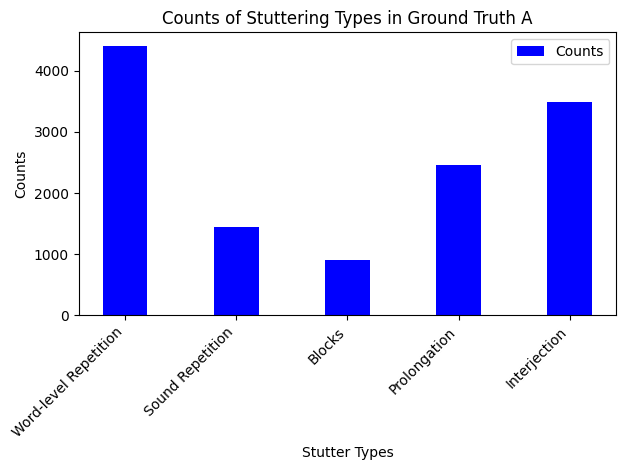

In [42]:
gt_A = pd.read_csv(ground_truth_A)

gt_transcript_A = gt_A['ground_truth']

stutter_types = {
    'Word-level Repetition': list,
    'Sound Repetition': list,
    'Blocks': list,
    'Prolongation': list,
    'Interjection': list
}

stutter_types['Word-level Repetition'] = gt_transcript_A[gt_transcript_A.str.contains(r'\[')].index.tolist()
stutter_types['Sound Repetition'] = gt_transcript_A[gt_transcript_A.str.contains(r'/r')].index.tolist()
stutter_types['Blocks'] = gt_transcript_A[gt_transcript_A.str.contains(r'/b')].index.tolist()
stutter_types['Prolongation'] = gt_transcript_A[gt_transcript_A.str.contains(r'/p')].index.tolist()
stutter_types['Interjection'] = gt_transcript_A[gt_transcript_A.str.contains(r'/i')].index.tolist()

counts = [len(stutter_types[key]) for key in stutter_types]

x = np.arange(len(stutter_types))  
width = 0.4

fig, ax = plt.subplots()

# Plotting the bar chart
ax.bar(x, counts, width, color='blue')

ax.set_xlabel('Stutter Types')
ax.set_ylabel('Counts')
ax.set_title('Counts of Stuttering Types in Ground Truth A')
ax.set_xticks(x)
ax.set_xticklabels(stutter_types.keys())  
ax.legend(['Counts'])

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


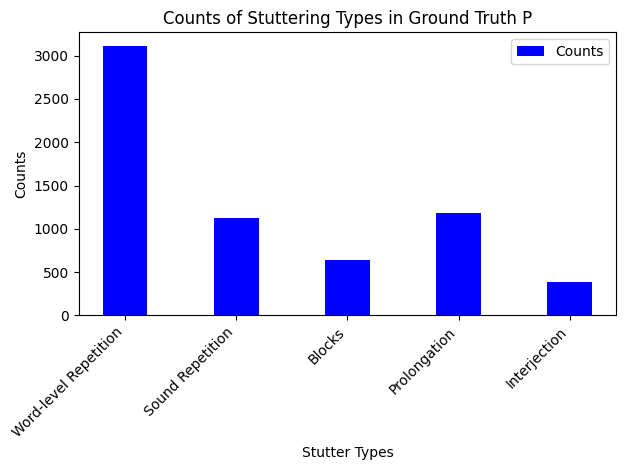

In [43]:
gt_P = pd.read_csv(ground_truth_P)

gt_transcript_P = gt_P['ground_truth']

stutter_types = {
    'Word-level Repetition': list,
    'Sound Repetition': list,
    'Blocks': list,
    'Prolongation': list,
    'Interjection': list
}

stutter_types['Word-level Repetition'] = gt_transcript_P[gt_transcript_P.str.contains(r'\[')].index.tolist()
stutter_types['Sound Repetition'] = gt_transcript_P[gt_transcript_P.str.contains(r'/r')].index.tolist()
stutter_types['Blocks'] = gt_transcript_P[gt_transcript_P.str.contains(r'/b')].index.tolist()
stutter_types['Prolongation'] = gt_transcript_P[gt_transcript_P.str.contains(r'/p')].index.tolist()
stutter_types['Interjection'] = gt_transcript_P[gt_transcript_P.str.contains(r'/i')].index.tolist()

counts = [len(stutter_types[key]) for key in stutter_types]

x = np.arange(len(stutter_types))  
width = 0.4

fig, ax = plt.subplots()

# Plotting the bar chart
ax.bar(x, counts, width, color='blue')

ax.set_xlabel('Stutter Types')
ax.set_ylabel('Counts')
ax.set_title('Counts of Stuttering Types in Ground Truth P')
ax.set_xticks(x)
ax.set_xticklabels(stutter_types.keys())  
ax.legend(['Counts'])

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
